# 📋 Estructura del Proyecto - 5 Etapas

Este notebook está organizado en 5 etapas claramente definidas para facilitar su comprensión y ejecución:

## 🔧 Etapa 1: Configuración y Descarga de Datos
- Instalación de dependencias necesarias (PyTorch, scikit-learn, etc.)
- Verificación de GPU y configuración del dispositivo
- Descarga automática del dataset Fashion-MNIST

## 📊 Etapa 2: Preprocesamiento y Análisis Exploratorio
- Análisis del dataset Fashion-MNIST
- Normalización y visualización de datos
- Preparación de datos para el autoencoder

## 🏗️ Etapa 3: Arquitectura del Modelo
- Definición del autoencoder convolucional
- Configuración de encoder y decoder
- Preparación para entrenamiento con callbacks

## 🚀 Etapa 4: Entrenamiento
- Entrenamiento del autoencoder por 5 épocas
- Monitoreo en tiempo real del progreso
- Guardado del mejor modelo

## 📈 Etapa 5: Evaluación y Resultados
- Evaluación de la compresión y reconstrucción
- Visualización de imágenes originales vs reconstruidas
- Análisis de métricas de rendimiento y calidad

---

# Autoencoder para Compresión de Imágenes - Fashion-MNIST
## Framework: PyTorch (Sin TensorFlow)
### Codificar y reconstruir imágenes de ropa con reducción de dimensionalidad

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.4480 - val_loss: 0.3116
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.3059 - val_loss: 0.2990
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.2960 - val_loss: 0.2933
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.2897 - val_loss: 0.2903
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2865 - val_loss: 0.2871
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2842 - val_loss: 0.2854
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.2817 - val_loss: 0.2834
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 0.2814 - val_loss: 0.2820
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.2796 - val_loss: 0.2815
Epoch 10/20
235/235 ━━━━━━━━━

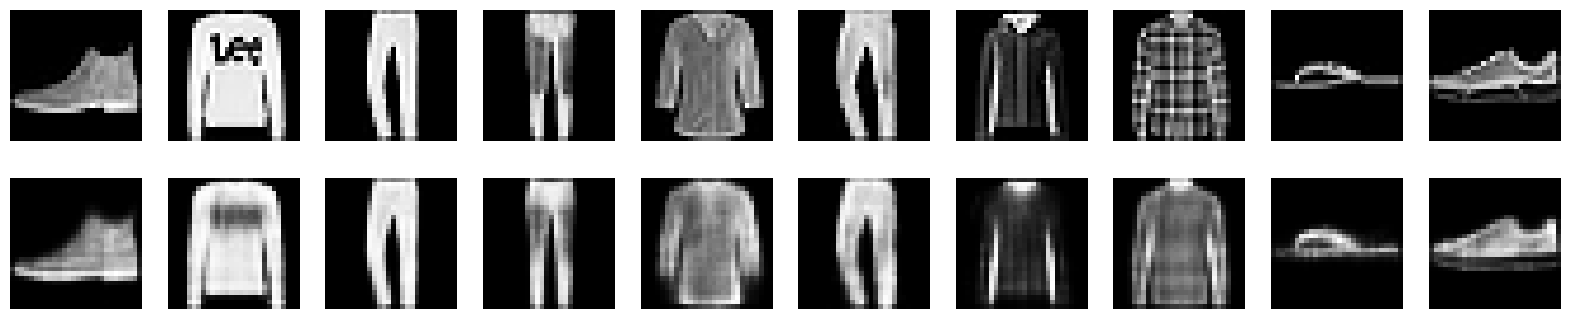

In [1]:
# ✅ Autoencoder con Fashion-MNIST
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

# Cargar dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

# Aplanar imágenes (28x28 → 784)
x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

# Dimensión del codificador
encoding_dim = 64

# Construcción del autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Entrenamiento
autoencoder.fit(x_train_flat, x_train_flat,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

# Reconstrucción
decoded_imgs = autoencoder.predict(x_test_flat)

# Visualización
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Imagen original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap="gray")
    plt.axis("off")

    # Imagen reconstruida
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()
